In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

## No missing data except _c39 so drop this column

In [5]:
data.drop(columns='_c39',inplace=True,axis=1)  #all value is null so drop column _c39

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

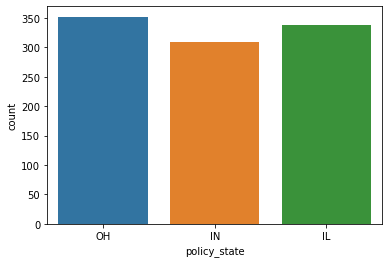

In [7]:
sns.countplot(data['policy_state'])
data['policy_state'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

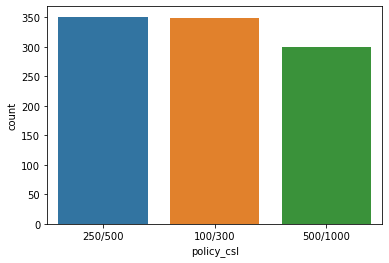

In [8]:
sns.countplot(data['policy_csl'])
data['policy_csl'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

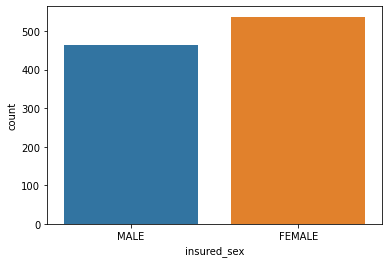

In [9]:
sns.countplot(data['insured_sex'])
data['insured_sex'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

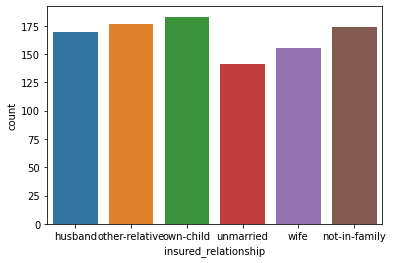

In [10]:
sns.countplot(data['insured_relationship'])
data['insured_relationship'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

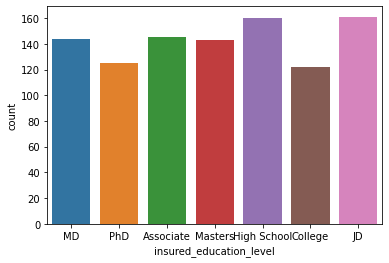

In [11]:
sns.countplot(data['insured_education_level'])
data['insured_education_level'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

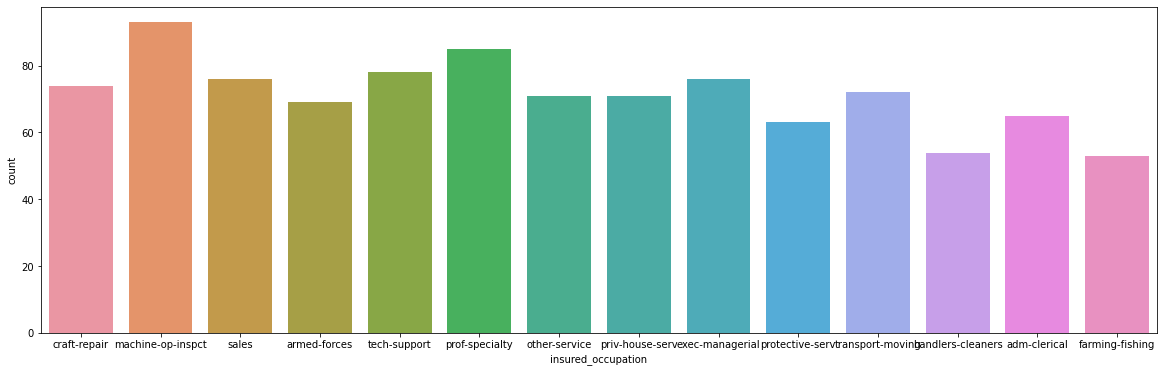

In [12]:
plt.figure(figsize=(20,6))
sns.countplot(data['insured_occupation'])
data['insured_occupation'].value_counts()

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64

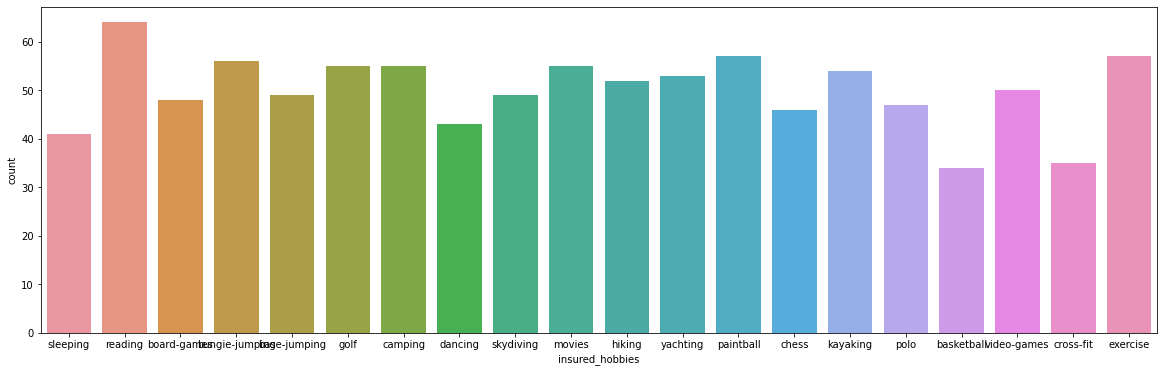

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(data['insured_hobbies'])
data['insured_hobbies'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

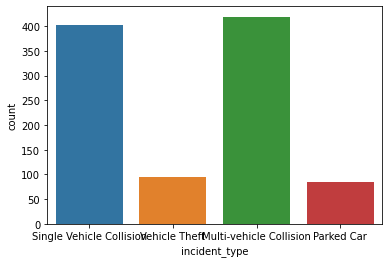

In [14]:
sns.countplot(data['incident_type'])
data['incident_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

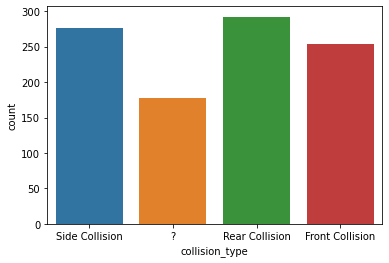

In [15]:
sns.countplot(data['collision_type'])
data['collision_type'].value_counts()

In [16]:
import numpy as np
data['collision_type']=data['collision_type'].replace('?',np.nan)

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

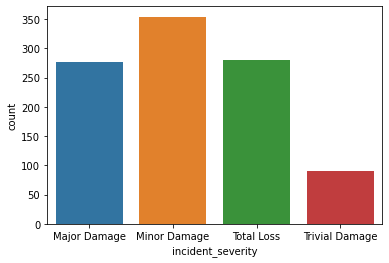

In [17]:
sns.countplot(data['incident_severity'])
data['incident_severity'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

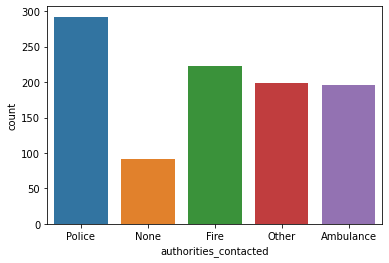

In [18]:
sns.countplot(data['authorities_contacted'])
data['authorities_contacted'].value_counts()

In [19]:
data['authorities_contacted']=data['authorities_contacted'].replace('None',np.nan)

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

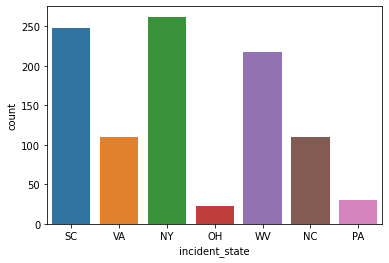

In [20]:
sns.countplot(data['incident_state'])
data['incident_state'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

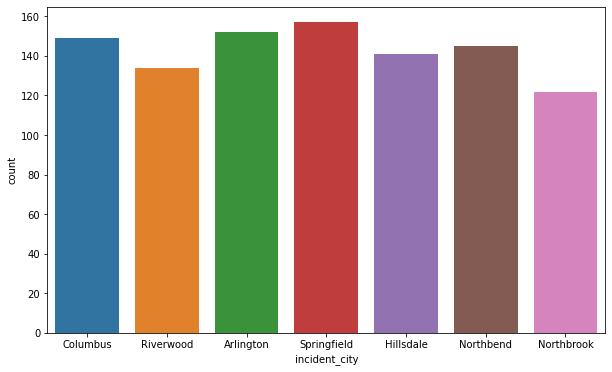

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(data['incident_city'])
data['incident_city'].value_counts()

1325 1st Lane            1
7609 Rock St             1
5783 Oak Ave             1
4519 Embaracadero St     1
1553 Lincoln St          1
                        ..
2457 Washington Ave      1
8983 Francis Ridge       1
4176 Britain Hwy         1
9633 MLK Lane            1
6456 Andromedia Drive    1
Name: incident_location, Length: 1000, dtype: int64

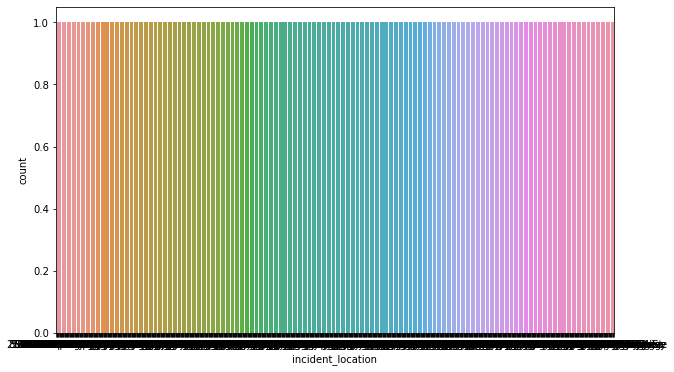

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data['incident_location'])
data['incident_location'].value_counts()

In [23]:
data['authorities_contacted'].fillna(data['authorities_contacted'].mode()[0],inplace=True)
data['collision_type'].fillna(data['collision_type'].mode()[0],inplace=True)

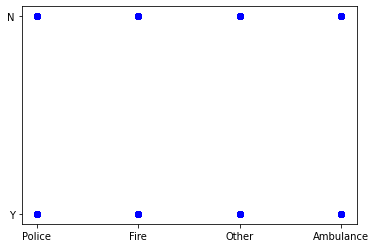

In [24]:
plt.plot(data['authorities_contacted'],data['fraud_reported'],'bo')

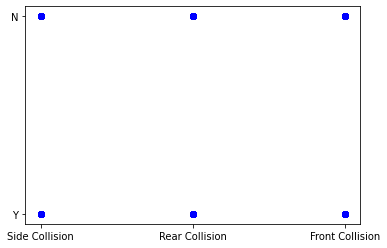

In [25]:
plt.plot(data['collision_type'],data['fraud_reported'],'bo')

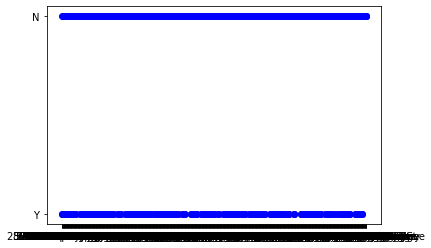

In [26]:
plt.plot(data['incident_location'],data['fraud_reported'],'bo')

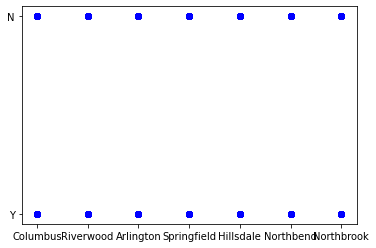

In [27]:
plt.plot(data['incident_city'],data['fraud_reported'],'bo')

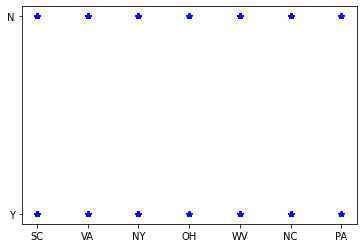

In [28]:
plt.plot(data['incident_state'],data['fraud_reported'],'b*')

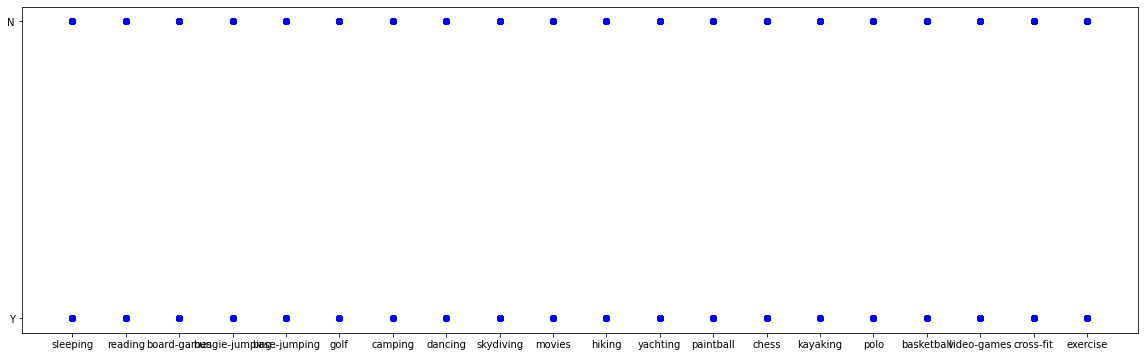

In [29]:
plt.figure(figsize=(20,6))
plt.plot(data['insured_hobbies'],data['fraud_reported'],'bo')

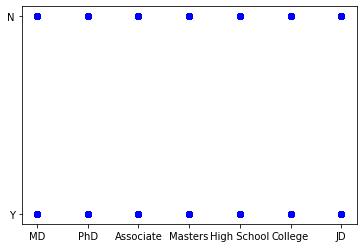

In [30]:
plt.plot(data['insured_education_level'],data['fraud_reported'],'bo')

In [31]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [32]:
lec = {}
for col in data.select_dtypes(include=['object']).columns:
    lec[col] = LabelEncoder()
    data[col] = lec[col].fit_transform(data[col])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   int32  
 4   policy_state                 1000 non-null   int32  
 5   policy_csl                   1000 non-null   int32  
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int32  
 11  insured_education_level      1000 non-null   int32  
 12  insured_occupation           1000 non-null   int32  
 13  insured_hobbies    

In [34]:
data.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


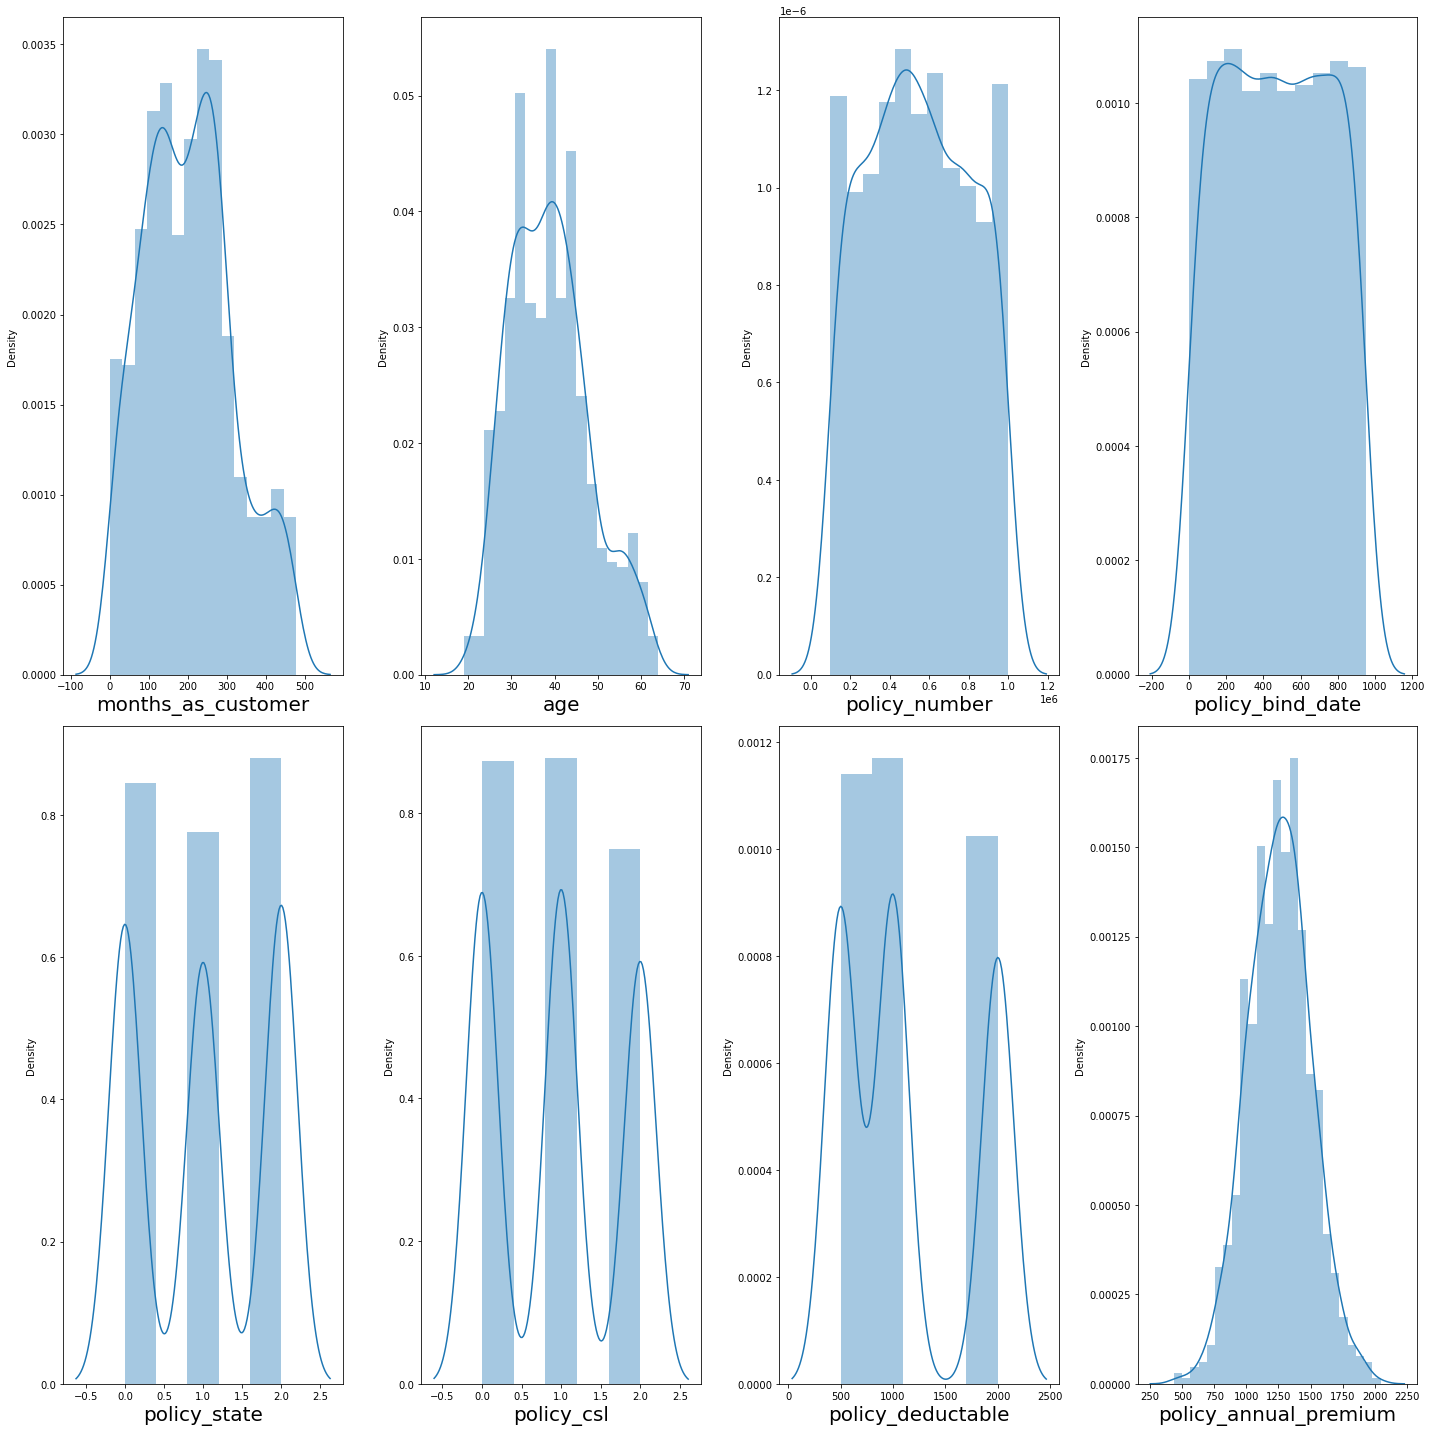

In [35]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [36]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [37]:
data=data.drop(columns=['age', 'policy_number', 'policy_bind_date','policy_state','insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_state','incident_hour_of_the_day','incident_city',
       'incident_location'],axis=1)

In [38]:
data

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_type,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,1,1000,1406.91,0,466132,53300,0,49,2,...,2,2,71610,6510,13020,52080,10,1,2004,1
1,228,1,2000,1197.22,5000000,468176,0,0,41,3,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,0,2000,1413.14,5000000,430632,35100,0,44,0,...,3,1,34650,7700,3850,23100,4,30,2007,0
3,256,1,2000,1415.74,6000000,608117,48900,-62400,19,2,...,2,1,63400,6340,6340,50720,3,34,2014,1
4,228,2,1000,1583.91,6000000,610706,66000,-46000,34,3,...,1,1,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,1000,1310.80,0,431289,0,0,44,2,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,0,1000,1436.79,0,608177,70900,0,47,2,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,1,500,1383.49,3000000,442797,35100,0,45,0,...,3,2,67500,7500,7500,52500,11,19,1996,0
998,458,2,2000,1356.92,5000000,441714,0,0,52,2,...,1,2,46980,5220,5220,36540,1,5,1998,0


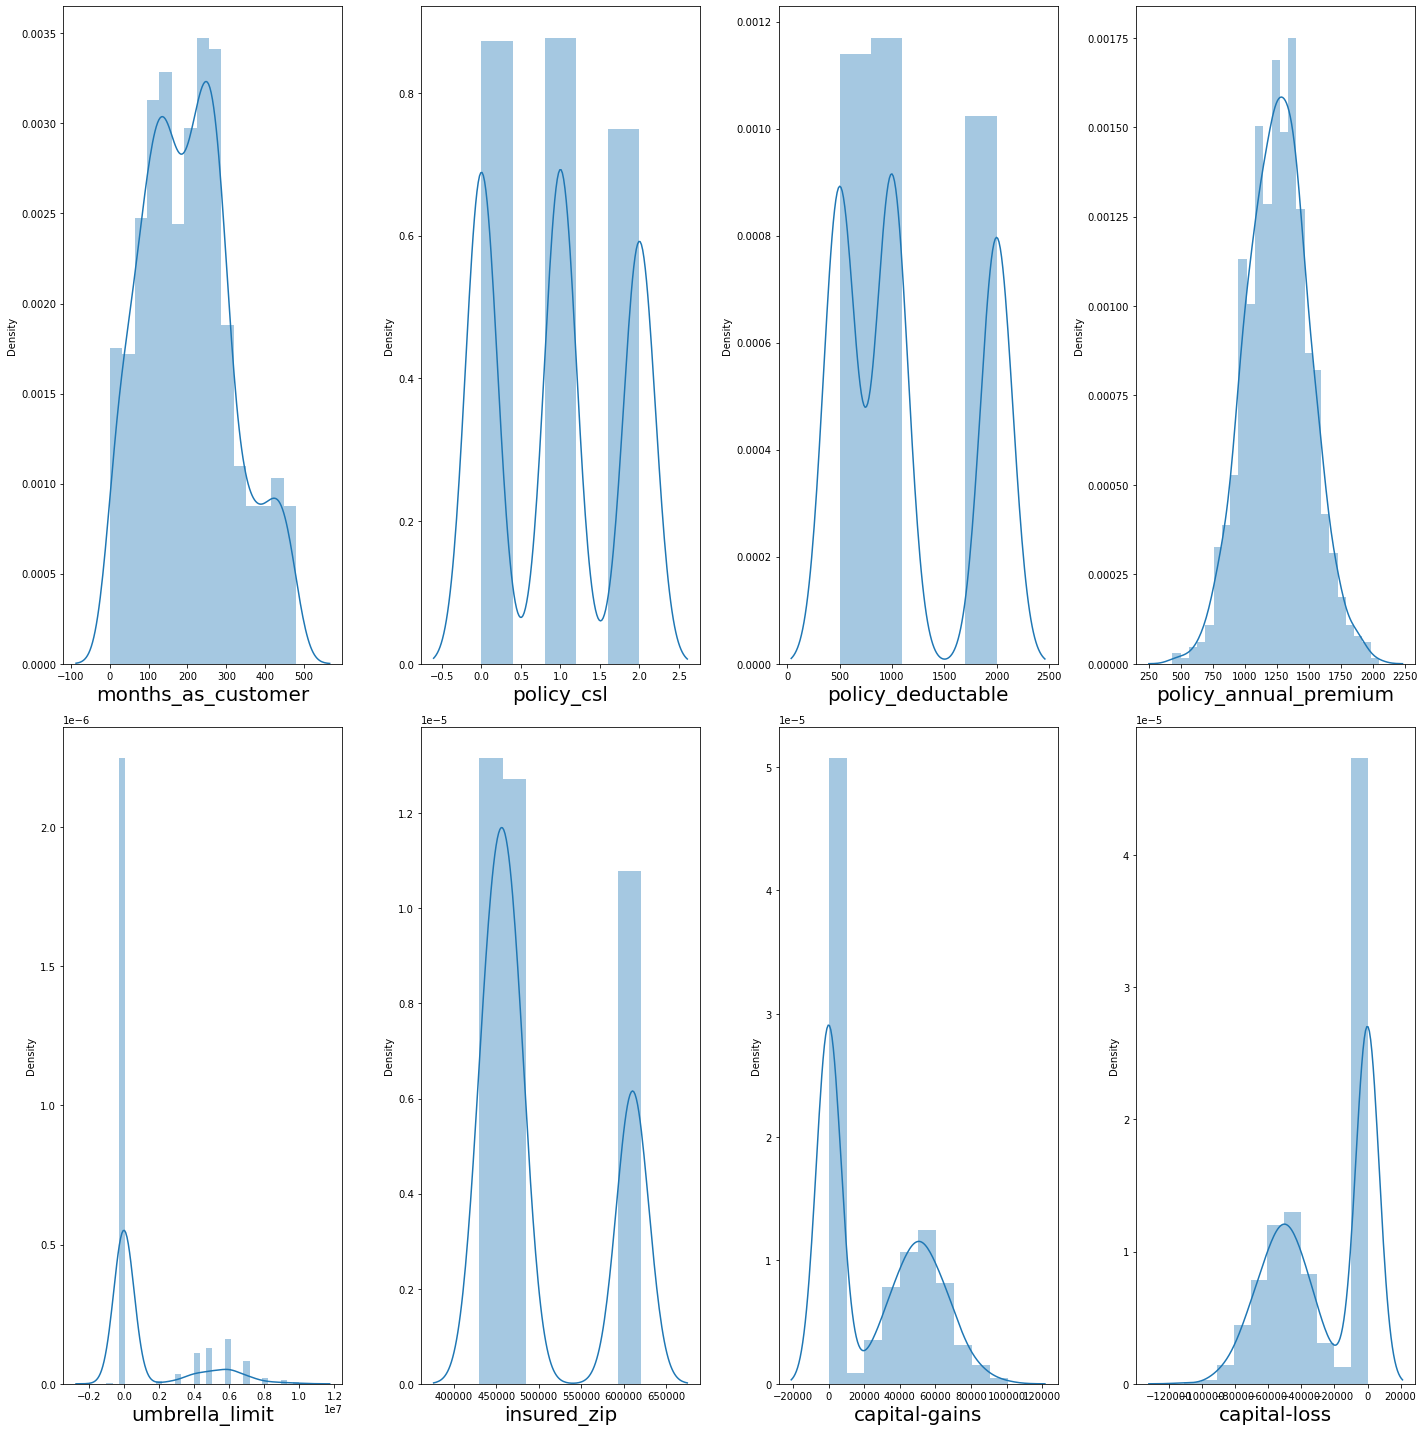

In [39]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [40]:
data.skew()

months_as_customer             0.362177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.301862
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_make                     -0.018797
auto_model                    -0.080773
auto_year                     -0.048289


<AxesSubplot:>

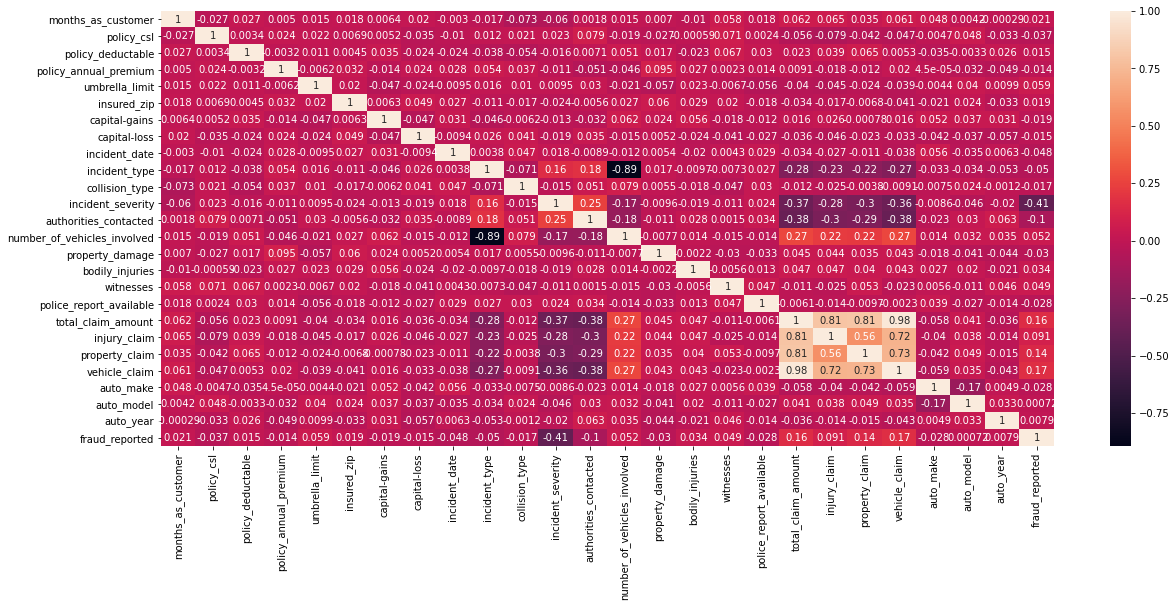

In [41]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

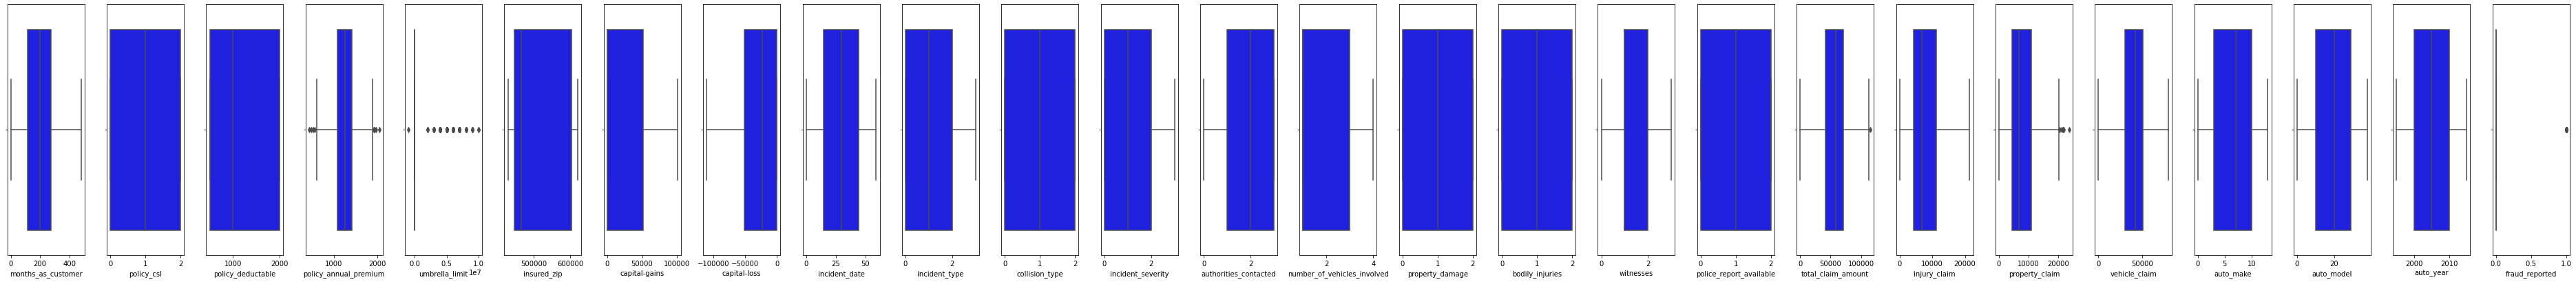

In [42]:
import matplotlib.pyplot as plt
collist=data.columns.values
ncol=30
nrows=16
plt.figure(figsize=(2*ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+2)
    sns.boxplot(data[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [44]:
X=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

In [45]:
sc.fit(X)

StandardScaler()

In [46]:
X=sc.transform(X)
X

array([[ 1.07813958,  0.06093665, -0.22238259, ...,  0.85646614,
        -1.64574255, -0.1834404 ],
       [ 0.2089946 ,  0.06093665,  1.41278352, ...,  0.36053902,
        -0.65747047,  0.31549088],
       [-0.60800168, -1.18266843,  1.41278352, ..., -0.63131523,
         0.95970204,  0.31549088],
       ...,
       [-0.64276748,  0.06093665, -1.03996564, ...,  1.1044297 ,
        -0.02857005, -1.5139238 ],
       [ 2.20802805,  1.30454172,  1.41278352, ..., -1.37520591,
        -1.28637088, -1.18130295],
       [ 2.19064515,  0.06093665, -0.22238259, ...,  0.36053902,
        -0.65747047,  0.31549088]])

In [47]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int32

## Outcome is in only two variable so we have to use classification model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

In [49]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gn=GaussianNB()
svc=SVC()

In [50]:
for i in range(0,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state {i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:-{accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:-0.8053333333333333
At random state 0,the testing accuracy is:-0.772


At random state 1,the training accuracy is:-0.8053333333333333
At random state 1,the testing accuracy is:-0.756


At random state 2,the training accuracy is:-0.7933333333333333
At random state 2,the testing accuracy is:-0.768


At random state 3,the training accuracy is:-0.796
At random state 3,the testing accuracy is:-0.756


At random state 4,the training accuracy is:-0.8066666666666666
At random state 4,the testing accuracy is:-0.756


At random state 5,the training accuracy is:-0.812
At random state 5,the testing accuracy is:-0.764


At random state 6,the training accuracy is:-0.8053333333333333
At random state 6,the testing accuracy is:-0.8


At random state 7,the training accuracy is:-0.8146666666666667
At random state 7,the testing accuracy is:-0.732


At random state 8,the training accuracy is:-0.812
At random state 8,the testing accuracy is:-0.788


At random state

At random state 86,the training accuracy is:-0.812
At random state 86,the testing accuracy is:-0.772


At random state 87,the training accuracy is:-0.8066666666666666
At random state 87,the testing accuracy is:-0.804


At random state 88,the training accuracy is:-0.824
At random state 88,the testing accuracy is:-0.768


At random state 89,the training accuracy is:-0.812
At random state 89,the testing accuracy is:-0.76


At random state 90,the training accuracy is:-0.816
At random state 90,the testing accuracy is:-0.74


At random state 91,the training accuracy is:-0.7946666666666666
At random state 91,the testing accuracy is:-0.78


At random state 92,the training accuracy is:-0.804
At random state 92,the testing accuracy is:-0.8


At random state 93,the training accuracy is:-0.8146666666666667
At random state 93,the testing accuracy is:-0.78


At random state 94,the training accuracy is:-0.8213333333333334
At random state 94,the testing accuracy is:-0.74


At random state 95,the train

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=79)
for i in [lr,dt,knn,gn,svc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for Test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

LogisticRegression()
Accuracy Score for Test Data is: 0.824
Accuracy Score for Train Data is:  0.812
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       203
           1       0.55      0.38      0.45        47

    accuracy                           0.82       250
   macro avg       0.71      0.65      0.67       250
weighted avg       0.81      0.82      0.81       250

-----Confusion Matrix---------
[[188  15]
 [ 29  18]]


DecisionTreeClassifier()
Accuracy Score for Test Data is: 0.712
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       203
           1       0.30      0.38      0.33        47

    accuracy                           0.71       250
   macro avg       0.57      0.59      0.57       250
weighted avg 

In [52]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [53]:
rc=RandomForestClassifier()
ac=AdaBoostClassifier()
gc=GradientBoostingClassifier()

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=79)
for i in [rc,ac,gc]:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    test_score=accuracy_score(y_test,pred)
    train_score=accuracy_score(y_train,i.predict(X_train))
    print(i)
    print("Accuracy Score for test Data is:",test_score)
    print("Accuracy Score for Train Data is: ",train_score)
    print("---------------------Classification Report---------------------")
    print(classification_report(y_test,pred))
    print("-----Confusion Matrix---------")
    print(confusion_matrix(y_test,pred))
    print("\n")

RandomForestClassifier()
Accuracy Score for test Data is: 0.796
Accuracy Score for Train Data is:  1.0
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       203
           1       0.44      0.34      0.39        47

    accuracy                           0.80       250
   macro avg       0.65      0.62      0.63       250
weighted avg       0.78      0.80      0.79       250

-----Confusion Matrix---------
[[183  20]
 [ 31  16]]


AdaBoostClassifier()
Accuracy Score for test Data is: 0.796
Accuracy Score for Train Data is:  0.848
---------------------Classification Report---------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       203
           1       0.44      0.34      0.39        47

    accuracy                           0.80       250
   macro avg       0.65      0.62      0.63       250
weighted avg 

## After checking all the binary classifier model logistic regression gives best result as 82%

## Cross validation score

In [55]:
pred_lr=lr.predict(X_test)
from sklearn.model_selection import cross_val_score
lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore=cross_val_score(lr,X,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("cross validation score is:-",lsc*100)
    print("accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
cross validation score is:- 77.4
accuracy_score is:- 82.39999999999999


At cv:- 3
cross validation score is:- 77.19875564186941
accuracy_score is:- 82.39999999999999


At cv:- 4
cross validation score is:- 78.50000000000001
accuracy_score is:- 82.39999999999999


At cv:- 5
cross validation score is:- 78.3
accuracy_score is:- 82.39999999999999


At cv:- 6
cross validation score is:- 78.3054373181348
accuracy_score is:- 82.39999999999999


At cv:- 7
cross validation score is:- 78.60590114111241
accuracy_score is:- 82.39999999999999


At cv:- 8
cross validation score is:- 79.4
accuracy_score is:- 82.39999999999999


At cv:- 9
cross validation score is:- 78.40072215072215
accuracy_score is:- 82.39999999999999




In [56]:
score_selected=cross_val_score(lr,X,y,cv=8).mean()
print("The cv score is:",score_selected,"\nThe accuracy score is:",lss)

The cv score is: 0.794 
The accuracy score is: 0.824


In [57]:
lr.fit(X_train,y_train)

LogisticRegression()

## AUC ROC Curve

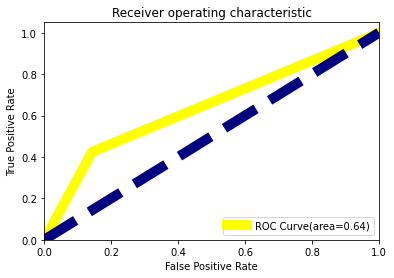

In [58]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresolds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,lw=10,color='yellow',label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

## Model saving

In [59]:
import pickle
filename='Insurance_fraud.pkl'
pickle.dump(lr,open(filename,'wb'))

## Conclusion

In [60]:
a=np.array(y_test)
predicted=np.array(lr.predict(X_test))
data_con=pd.DataFrame({'Original':a,'predicted':predicted})
data_con

,Original,predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
245,0,0
246,0,0
247,0,0
248,0,0


In [61]:
data_con.head(25)

,Original,predicted
0,1,1
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
